In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/AdjustedCleanTapasData.csv')
train.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,tapa adventuring rp,Off Topic,"Nov 28, 2020 12:45 am",8.0,17800.0,24300.0,hey mood roleplaying present adventuring rp no...,created thread set adventurefeel free enter sc...,tapa adventuring rp hey mood roleplaying again...
1,le château de malheureux ddd,Off Topic,"Aug 14, 2020 3:20 pm",5.0,19900.0,35100.0,welcome dungeon ding dong private murder myste...,name carole losnedahlage ft specie angel sorta...,le château de malheureux ddd welcome dungeon d...
2,writer paid collabs,Off Topic,"Jul 22, 2021 4:40 pm",0.0,1.0,11.0,hello enquire collabs script tell adapt either...,rate artist pay adapt,writer paid collabs how it hello enquire colla...
3,fantasy book unique worldbuilding,Off Topic,"Jul 22, 2021 2:24 pm",5.0,3.0,39.0,found featured article worldbuilding huge fan ...,awesome done must pretty wild featured alongsi...,fantasy book unique worldbuilding found featur...
4,game playing right,Off Topic,"Nov 10, 2019 1:34 pm",13.0,1000.0,10600.0,video game board game hand held game puzzle ga...,simplykit video game fire emblem enjoying micr...,what game playing right now video game board g...


**N-grams**

In [3]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
from textblob import Word

TextBlob(train['Original Post'][0]).ngrams(2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[WordList(['hey', 'mood']),
 WordList(['mood', 'roleplaying']),
 WordList(['roleplaying', 'present']),
 WordList(['present', 'adventuring']),
 WordList(['adventuring', 'rp']),
 WordList(['rp', 'novelist']),
 WordList(['novelist', 'welcome']),
 WordList(['welcome', 'rp']),
 WordList(['rp', 'adventure']),
 WordList(['adventure', 'together']),
 WordList(['together', 'kind']),
 WordList(['kind', 'adventure']),
 WordList(['adventure', 'party']),
 WordList(['party', 'able']),
 WordList(['able', 'travel']),
 WordList(['travel', 'along']),
 WordList(['along', 'experience']),
 WordList(['experience', 'adventure']),
 WordList(['adventure', 'universe']),
 WordList(['universe', 'dual']),
 WordList(['dual', 'rpers']),
 WordList(['rpers', 'partake']),
 WordList(['partake', 'around']),
 WordList(['around', 'est']),
 WordList(['est', 'timezone']),
 WordList(['timezone', 'getting']),
 WordList(['getting', 'roleplay']),
 WordList(['roleplay', 'may']),
 WordList(['may', 'easier']),
 WordList(['easier', '

**Term frequency**

In [4]:
tf1 = (train['Original Post'][:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,magic,16.0
1,personality,13.0
2,height,12.0
3,age,12.0
4,blue,11.0
...,...,...
1183,lacuna,1.0
1184,closet,1.0
1185,vegetate,1.0
1186,gambling,1.0


**Inverse Document Frequency**

In [5]:
import numpy as np

# The more the value of IDF, the more unique the word is.
for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Original Post'].str.contains(word, na=False)])))
tf1   

,words,tf,idf
0,magic,16.0,2.955416
1,personality,13.0,4.398479
2,height,12.0,5.460390
3,age,12.0,1.607945
4,blue,11.0,3.965363
...,...,...,...
1183,lacuna,1.0,7.279549
1184,closet,1.0,6.991867
1185,vegetate,1.0,9.071308
1186,gambling,1.0,7.125398


**Term Frequency – Inverse Document Frequency (TF-IDF)**

In [6]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,magic,16.0,2.955416,47.286657
1,personality,13.0,4.398479,57.180231
2,height,12.0,5.460390,65.524683
3,age,12.0,1.607945,19.295341
4,blue,11.0,3.965363,43.618990
...,...,...,...,...
1183,lacuna,1.0,7.279549,7.279549
1184,closet,1.0,6.991867,6.991867
1185,vegetate,1.0,9.071308,9.071308
1186,gambling,1.0,7.125398,7.125398


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['Original Post'].values.astype('U'))
train_vect

<8702x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 178790 stored elements in Compressed Sparse Row format>

In [8]:
print(train_vect)

  (0, 639)	0.016851273186584397
  (0, 872)	0.022941036314794192
  (0, 748)	0.03643741534536488
  (0, 720)	0.023318461094538497
  (0, 339)	0.024501469973213303
  (0, 235)	0.019912631659230504
  (0, 479)	0.025921457097597533
  (0, 740)	0.014946255520745211
  (0, 366)	0.025857561806637033
  (0, 359)	0.023108627755352225
  (0, 751)	0.041873843351423905
  (0, 834)	0.022875731518629778
  (0, 162)	0.022974052423075163
  (0, 293)	0.024408953166301994
  (0, 736)	0.05929624331654725
  (0, 10)	0.034289097216850035
  (0, 701)	0.03943481397266178
  (0, 238)	0.035189238335122865
  (0, 314)	0.01959186799390172
  (0, 534)	0.019669912992344534
  (0, 265)	0.026542090423001798
  (0, 398)	0.01878740302463751
  (0, 971)	0.044541254823561256
  (0, 905)	0.025610795763404363
  (0, 109)	0.023653061279739002
  :	:
  (8701, 505)	0.09780405771175761
  (8701, 349)	0.07153341125082716
  (8701, 64)	0.08089319273271772
  (8701, 959)	0.09158327296077523
  (8701, 887)	0.07694676174612017
  (8701, 770)	0.082061140386702

**Check for NaN values**

In [9]:
train_data = train.copy()
train_data.isna().sum()

Title            600
Category           0
Date             600
Likes            600
Num Replies      600
Num Views        600
Original Post    650
Comments         604
Post               0
dtype: int64

In [10]:
train.isna().sum()

Title            600
Category           0
Date             600
Likes            600
Num Replies      600
Num Views        600
Original Post    650
Comments         604
Post               0
dtype: int64

**Bag of Words**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['Original Post'].values.astype('U'))
train_bow

<8702x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 201780 stored elements in Compressed Sparse Row format>

In [12]:
print(train_bow)

  (0, 409)	2
  (0, 661)	1
  (0, 581)	1
  (0, 960)	1
  (0, 17)	7
  (0, 883)	1
  (0, 467)	2
  (0, 616)	1
  (0, 1)	4
  (0, 28)	4
  (0, 288)	2
  (0, 911)	1
  (0, 51)	5
  (0, 364)	3
  (0, 531)	5
  (0, 250)	2
  (0, 739)	6
  (0, 368)	1
  (0, 8)	2
  (0, 890)	1
  (0, 591)	2
  (0, 602)	6
  (0, 423)	1
  (0, 957)	1
  (0, 555)	1
  :	:
  (8701, 952)	1
  (8701, 71)	1
  (8701, 346)	1
  (8701, 504)	1
  (8701, 119)	1
  (8701, 195)	2
  (8701, 164)	1
  (8701, 238)	1
  (8701, 241)	1
  (8701, 730)	4
  (8701, 654)	1
  (8701, 128)	2
  (8701, 694)	1
  (8701, 129)	1
  (8701, 838)	1
  (8701, 632)	1
  (8701, 24)	1
  (8701, 735)	7
  (8701, 793)	2
  (8701, 823)	1
  (8701, 858)	1
  (8701, 625)	1
  (8701, 215)	1
  (8701, 653)	2
  (8701, 724)	1


**Sentiment Analysis**

In [13]:
train['Original Post'][:5].apply(lambda x: TextBlob(x).sentiment)

0      (0.07774417103364474, 0.5164145717829925)
1        (0.1693181818181818, 0.603409090909091)
2      (0.06666666666666667, 0.4666666666666666)
3                                  (0.535, 0.74)
4    (-0.39999999999999997, 0.39999999999999997)
Name: Original Post, dtype: object

In [14]:
train['sentiment'] = train['Original Post'][:5].apply(lambda x: TextBlob(x).sentiment[0] )
train[['Original Post','sentiment']].head()

,Original Post,sentiment
0,hey mood roleplaying present adventuring rp no...,0.077744
1,welcome dungeon ding dong private murder myste...,0.169318
2,hello enquire collabs script tell adapt either...,0.066667
3,found featured article worldbuilding huge fan ...,0.535000
4,video game board game hand held game puzzle ga...,-0.400000


**Word Embeddings**

In [15]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-08-21 19:24:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-08-21 19:24:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-08-21 19:24:55--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [16]:
!unzip "glove.6B.zip"

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [17]:
!pip install gensim

In [18]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [19]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# Let’s say our post contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:
model['go']

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ,  0.51755 ,  0.51998 ,
        0.15218 ,  0.41485 , -0.12377 , -0.37222 ,  0.0273  ,  0.75673 ,
       -0.8739  ,  0.58935 ,  0.46662 ,  0.62918 ,  0.092603, -0.012868,
       -0.015169,  0.25567 , -0.43025 , -0.77668 ,  0.71449 , -0.3834  ,
       -0.69638 ,  0.23522 ,  0.11396 ,  0.02778 ,  0.071357,  0.87409 ,
       -0.1281  ,  0.063576,  0.067867, -0.50181 , -0.28523 , -0.072536,
       -0.50738 , -0.6914  , -0.53579 , -0.11361 , -0.38234 , -0.12414 ,
        0.011214, -1.1622  ,  0.037057, -0.18495 ,  0.01416 ,  0.87193 ,
       -0.097309, -2.3565  , -0.14554 ,  0.28275 ,  2.0053  ,  0.23439 ,
       -0.38298 ,  0.69539 , -0.44916 , -0.094157,  0.90527 ,  0.65764 ,
        0.27628 ,  0.30688 , -0.57781 , -0.22987 , -0.083043, -0.57236 ,
       -0.299   , -0.81112 ,  0.039752, -0.05681 , -0.48879 , -0.18091 ,
       -0.28152 , -0.20559 ,  0.4932  , -0.033999, 

In [20]:
model['away']

array([-0.10379 , -0.014792,  0.59933 , -0.51316 , -0.036463,  0.6588  ,
       -0.57906 ,  0.17819 ,  0.23663 , -0.21384 ,  0.55339 ,  0.53597 ,
        0.041444,  0.16095 ,  0.017093, -0.37242 ,  0.017974,  0.39268 ,
       -0.23265 ,  0.1818  ,  0.66405 ,  0.98163 ,  0.42339 ,  0.030581,
        0.35015 ,  0.25519 , -0.71182 , -0.42184 ,  0.13068 , -0.47452 ,
       -0.08175 ,  0.1574  , -0.13262 ,  0.22679 , -0.16885 , -0.11122 ,
       -0.32272 , -0.020978, -0.43345 ,  0.172   , -0.67366 , -0.79052 ,
        0.10556 , -0.4219  , -0.12385 , -0.063486, -0.17843 ,  0.56359 ,
        0.16986 , -0.17804 ,  0.13956 , -0.20169 ,  0.078985,  1.4497  ,
        0.23556 , -2.6014  , -0.5286  , -0.11636 ,  1.7184  ,  0.33254 ,
        0.12136 ,  1.1602  , -0.2914  ,  0.47125 ,  0.41869 ,  0.35271 ,
        0.47869 , -0.042281, -0.18294 ,  0.1796  , -0.24431 , -0.34042 ,
        0.20337 , -0.93676 ,  0.013077,  0.080339, -0.36604 , -0.44005 ,
       -0.35393 ,  0.15907 ,  0.55807 ,  0.1492  , 

In [21]:
# We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.
(model['go'] + model['away'])/2

array([-0.091342  ,  0.223404  ,  0.58856   , -0.614765  , -0.0838365 ,
        0.5387    , -0.43531   ,  0.349125  ,  0.163308  , -0.28223   ,
        0.53547   ,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.553275  ,  0.385575  ,
        0.565335  ,  0.805405  ,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543   , -0.571035  , -0.59926   ,  0.422585  , -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.381435  , -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55665   , -0.32982   ,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332   ,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895   , -0.33707   ,  0.083195  ,  1.86185   ,  0.283465  ,
       -0.13081   ,  0.927795  , -0.37028   ,  0.1885465 ,  0.66198   ,
        0.505175  ,  0.37748498,  0.1322995 , -0.380375  , -0.02

**Recommendation based on post title and then original post**

In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

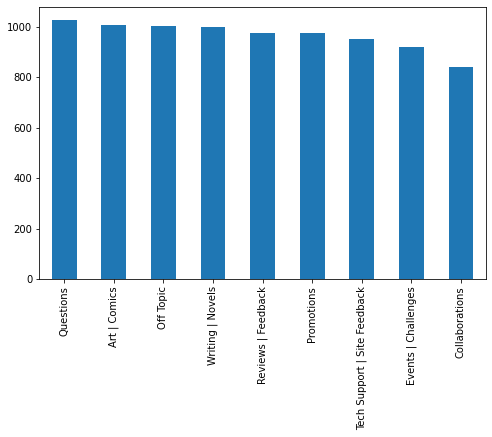

In [23]:
train['Category'].value_counts().plot(x = 'category', y ='count', kind = 'bar', figsize = (8,5) )

In [24]:
# Printing the book title and description randomly
train['Title'][992]


'discord superhero genre comic'

In [25]:
train['Original Post'][992]

'hi discord superhero genre focused server meet minded whose superhero genre planning'

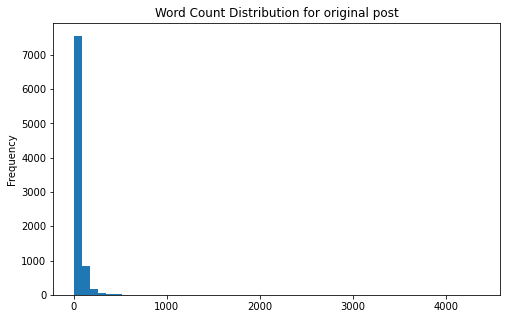

In [26]:
train['word_count'] = train['Original Post'].apply(lambda x: len(str(x).split()))# Plotting the word count
train['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (8,5),title='Word Count Distribution for original post')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


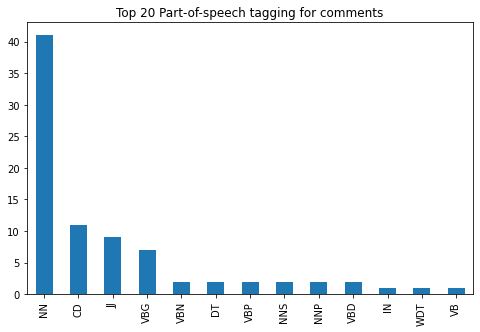

In [27]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
blob = TextBlob(str(train['Original Post']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(8,5), title = "Top 20 Part-of-speech tagging for comments")

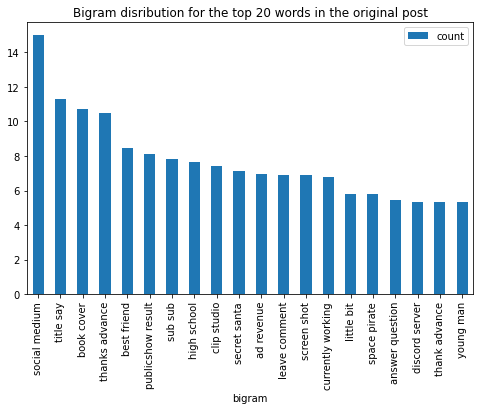

In [28]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(train['Original Post'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the original post", figsize = (8,5), )

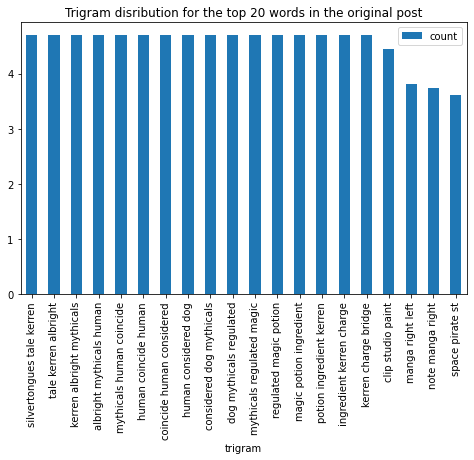

In [32]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(train['Original Post'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the original post", figsize = (8,5), )

In [30]:
# Function for recommending posts based on post title. It takes post title and category as an input.
def recommend(title, categ):  
  # Matching the genre with the dataset and reset the index
  data = train.loc[train['Category'] == categ]  
  data.reset_index(level = 0, inplace = True) 
    
  # Convert the index into series
  indices = pd.Series(data.index, index = data['Title'])
      
  #Converting the book title into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['Title'])
      
  # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
      
  # Get the index corresponding to original_title
        
  idx = indices[title]# Get the pairwsie similarity scores 
  sig = list(enumerate(sg[idx]))# Sort the books
  sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
  sig = sig[1:6]# Book indicies
  post_indices = [i[0] for i in sig]
    
  # Top 5 book recommendation
  rec = data['Title'].iloc[post_indices]
        
  # It reads the top 5 recommended book urls and print the images
      
  print(rec)

from sklearn.metrics.pairwise import cosine_similarity
recommend("writer paid collabs", "Off Topic")

0                  tapa adventuring rp
1         le château de malheureux ddd
3    fantasy book unique worldbuilding
4                   game playing right
5         whats yalls opinion religion
Name: Title, dtype: object


In [31]:
# Function for recommending posts based on the original post. It takes org. post and genre as an input.
def recommend(title, genre):
    
    global rec
    # Matching the genre with the dataset and reset the index
    data = train.loc[train['Category'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['Title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['Original Post'].values.astype('U'))
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))# Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)# Scores of the 5 most similar books 
    sig = sig[1:6]# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data['Title'].iloc[movie_indices]
    
    # It reads the top 5 recommend book url and print the images
    
    print(rec)

from sklearn.metrics.pairwise import cosine_similarity
recommend("game playing right", "Off Topic")

613    unpopular opinion music edition
526                      notice senpai
326    unpopular opinion movie edition
659                new year resolution
133                   game guy playing
Name: Title, dtype: object
